# 1. Objective of the Project
#### Goal: Analyzing shipment data to identify operational anomalies that could affect delivery performance or efficiency.
#### Why: Operations managers want to focus on problem areas instead of sifting through all shipments.

In [3]:
import pandas as pd

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [4]:
df = pd.read_csv('shipments_dataset.csv')

df.head(10)

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Weight_kg,Status,Carrier
0,O00001,W1,NYC,Denver,2025-07-06,2025-07-07,2025-07-08,2025-07-11,58.16,Delivered,Carrier A
1,O00002,W2,Seattle,NYC,2025-08-26,2025-08-26,2025-08-31,2025-09-01,40.77,Delivered,Carrier A
2,O00003,W5,Houston,NYC,2025-06-04,2025-06-04,2025-06-05,2025-06-08,73.69,Delivered,Carrier A
3,O00004,W2,Miami,Seattle,2025-06-04,2025-06-04,2025-06-09,2025-06-11,61.51,Delayed,Carrier A
4,O00005,W5,Houston,LA,2025-07-28,2025-07-28,2025-08-02,2025-08-04,41.43,Delivered,Carrier B
5,O00006,W1,Denver,LA,2025-08-29,2025-08-30,2025-09-02,2025-09-02,36.14,Delivered,Carrier B
6,O00007,W3,LA,Chicago,2025-07-14,2025-07-14,2025-07-15,2025-07-15,46.23,Delivered,Carrier A
7,O00008,W4,NYC,Houston,2025-07-15,2025-07-16,2025-07-20,2025-07-22,47.54,Delivered,Carrier B
8,O00009,W1,Seattle,Houston,2025-08-08,2025-08-08,2025-08-09,2025-08-12,32.74,Delivered,Carrier B
9,O00010,W1,Miami,Chicago,2025-08-20,2025-08-21,2025-08-25,2025-08-25,55.64,In-Transit,Carrier B


In [5]:
df.info()
# are there any missing values in dataset?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_ID             1000 non-null   object 
 1   Warehouse_ID         1000 non-null   object 
 2   Origin               1000 non-null   object 
 3   Destination          1000 non-null   object 
 4   Scheduled_Ship_Date  1000 non-null   object 
 5   Actual_Ship_Date     1000 non-null   object 
 6   Scheduled_Delivery   1000 non-null   object 
 7   Actual_Delivery      1000 non-null   object 
 8   Weight_kg            1000 non-null   float64
 9   Status               1000 non-null   object 
 10  Carrier              1000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 86.1+ KB


In [6]:
df.describe()


,Weight_kg
count,1000.00000
mean,50.66104
std,14.69760
min,1.00000
25%,40.66000
50%,50.59500
75%,60.81750
max,108.89000


In [7]:
# first lets convert date columns to date time, initially our dates were strings not datetime datatype
date_cols = ['Scheduled_Ship_Date', 'Actual_Ship_Date', 'Scheduled_Delivery', 'Actual_Delivery']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df.head()

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Weight_kg,Status,Carrier
0,O00001,W1,NYC,Denver,2025-07-06,2025-07-07,2025-07-08,2025-07-11,58.16,Delivered,Carrier A
1,O00002,W2,Seattle,NYC,2025-08-26,2025-08-26,2025-08-31,2025-09-01,40.77,Delivered,Carrier A
2,O00003,W5,Houston,NYC,2025-06-04,2025-06-04,2025-06-05,2025-06-08,73.69,Delivered,Carrier A
3,O00004,W2,Miami,Seattle,2025-06-04,2025-06-04,2025-06-09,2025-06-11,61.51,Delayed,Carrier A
4,O00005,W5,Houston,LA,2025-07-28,2025-07-28,2025-08-02,2025-08-04,41.43,Delivered,Carrier B


In [8]:
df['Delivery_Delay'] = (df['Actual_Delivery'] - df['Scheduled_Delivery']).dt.days
df.head()
# with the help of above line we have created a new column to check the delay in our deliveries

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Weight_kg,Status,Carrier,Delivery_Delay
0,O00001,W1,NYC,Denver,2025-07-06,2025-07-07,2025-07-08,2025-07-11,58.16,Delivered,Carrier A,3
1,O00002,W2,Seattle,NYC,2025-08-26,2025-08-26,2025-08-31,2025-09-01,40.77,Delivered,Carrier A,1
2,O00003,W5,Houston,NYC,2025-06-04,2025-06-04,2025-06-05,2025-06-08,73.69,Delivered,Carrier A,3
3,O00004,W2,Miami,Seattle,2025-06-04,2025-06-04,2025-06-09,2025-06-11,61.51,Delayed,Carrier A,2
4,O00005,W5,Houston,LA,2025-07-28,2025-07-28,2025-08-02,2025-08-04,41.43,Delivered,Carrier B,2


In [9]:
df[['Order_ID', 'Warehouse_ID', 'Origin', 'Destination', 'Scheduled_Delivery','Actual_Delivery', 'Delivery_Delay']].head(10)

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Delivery,Actual_Delivery,Delivery_Delay
0,O00001,W1,NYC,Denver,2025-07-08,2025-07-11,3
1,O00002,W2,Seattle,NYC,2025-08-31,2025-09-01,1
2,O00003,W5,Houston,NYC,2025-06-05,2025-06-08,3
3,O00004,W2,Miami,Seattle,2025-06-09,2025-06-11,2
4,O00005,W5,Houston,LA,2025-08-02,2025-08-04,2
5,O00006,W1,Denver,LA,2025-09-02,2025-09-02,0
6,O00007,W3,LA,Chicago,2025-07-15,2025-07-15,0
7,O00008,W4,NYC,Houston,2025-07-20,2025-07-22,2
8,O00009,W1,Seattle,Houston,2025-08-09,2025-08-12,3
9,O00010,W1,Miami,Chicago,2025-08-25,2025-08-25,0


## 1. Data Cleaning & Exploration
#### Loaded dataset and checked basic statistics.
#### Explored Delivery_Delay and Weight_kg to understand normal ranges.

In [10]:
df['Delivery_Delay'].describe()

count    1000.000000
mean        1.855000
std         1.741553
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Delivery_Delay, dtype: float64

##### count is 1000 shipments, so there are no missing rows in delivery_delay column as other columns have 1000 rows only, mean is on average our shipments are about 2 days delayed approx,, if we pick a random shipment, it's likely to be ~2days late, 3. std=1.741 is standard deviation which means how spread out the delays are, most delays are mean +or- std, so roughly meaning (1.855-1.741 =~ 0 days, 1.855+1.741 =~3.6 days) this means most shipments are delayed between 0 and ~4Days, which matdhed our 75% numbers, min = 0 meaning some deliveries are on time, 25% 0 meaning 25% of our shipments were on time or earlier, 25% is calleds first quartile, 50%(Median) = 2 half of the shipments were delayed by 2 days or less, meadian is another mesure of typical delay, 75% = 3 75% of shipments were 3days late or less, only 25% of shipments were delayed more than 3 days, max = 5 the longest delay was 5 days. anything near max is unusual compared to most shipments

In [ ]:
# lets see the above point visually
import matplotlib.pyplot as plt

plt.hist(df['Delivery_Delay'], bins=range(0,15), edgecolor='black')
plt.xlabel('Delivery Delay (in days)')
plt.ylabel('Number of shipments')
plt.title('Histogram of Delivery delays')
plt.show()

In [12]:
#  LETS Create anomoly column to print our mean median and std etc in the table it self
df['Delay_Anomoly'] = df['Delivery_Delay'] >= 4

anomalies = df[df['Delay_Anomoly'] == True]
anomalies.head()

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Weight_kg,Status,Carrier,Delivery_Delay,Delay_Anomoly
12,O00013,W4,Chicago,Miami,2025-08-21,2025-08-21,2025-08-24,2025-08-29,32.10,Delivered,Carrier A,5,True
26,O00027,W5,Denver,Chicago,2025-08-22,2025-08-23,2025-08-25,2025-08-30,54.46,Delivered,Carrier A,5,True
51,O00052,W3,Denver,Houston,2025-07-07,2025-07-08,2025-07-11,2025-07-16,34.03,Delivered,Carrier C,5,True
54,O00055,W3,NYC,LA,2025-08-14,2025-08-14,2025-08-18,2025-08-23,77.99,Delivered,Carrier C,5,True
56,O00057,W1,Miami,NYC,2025-08-26,2025-08-26,2025-08-28,2025-09-02,67.38,Delivered,Carrier B,5,True


In [13]:
df['Lane'] = df['Origin']+'->'+df['Destination']

In [14]:
warehouse_delay = df.groupby('Warehouse_ID')['Delivery_Delay'].mean().sort_values(ascending=False)

lane_delay = df.groupby('Lane')['Delivery_Delay'].mean().sort_values(ascending=False)

In [15]:
def explain_delay(row):
    if row['Delay_Anomoly']:
        return f"Order {row['Order_ID']} Delayed {row['Delivery_Delay']} days, HIgher than normal."
    else:
        return "Normal Delay"
df['Anomoly_Explanation'] = df.apply(explain_delay, axis=1)

df[df['Delay_Anomoly']][['Order_ID',  'Warehouse_ID', 'Lane', 'Delivery_Delay', 'Anomoly_Explanation']]

,Order_ID,Warehouse_ID,Lane,Delivery_Delay,Anomoly_Explanation
12,O00013,W4,Chicago->Miami,5,"Order O00013 Delayed 5 days, HIgher than normal."
26,O00027,W5,Denver->Chicago,5,"Order O00027 Delayed 5 days, HIgher than normal."
51,O00052,W3,Denver->Houston,5,"Order O00052 Delayed 5 days, HIgher than normal."
54,O00055,W3,NYC->LA,5,"Order O00055 Delayed 5 days, HIgher than normal."
56,O00057,W1,Miami->NYC,5,"Order O00057 Delayed 5 days, HIgher than normal."
...,...,...,...,...,...
974,O00975,W3,Denver->Chicago,5,"Order O00975 Delayed 5 days, HIgher than normal."
979,O00980,W4,Denver->LA,5,"Order O00980 Delayed 5 days, HIgher than normal."
983,O00984,W3,LA->Houston,5,"Order O00984 Delayed 5 days, HIgher than normal."
987,O00988,W2,Denver->Chicago,5,"Order O00988 Delayed 5 days, HIgher than normal."


#### Q2. Weight outliers
<!--instead of delays this time, we're looking at shipment are unusually heavy or light which indicates
incorrect data entry
potential operational risl like overloaded trucks or underutilized cap
suspicious shipments-->

In [16]:
df['Weight_kg'].describe()

count    1000.00000
mean       50.66104
std        14.69760
min         1.00000
25%        40.66000
50%        50.59500
75%        60.81750
max       108.89000
Name: Weight_kg, dtype: float64

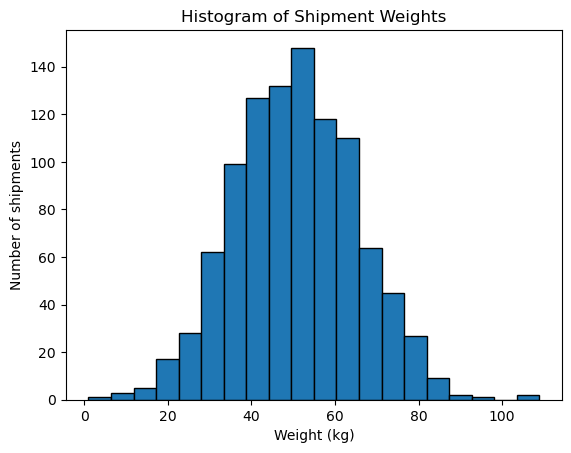

In [17]:
plt.hist(df['Weight_kg'], bins=20, edgecolor='black')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of shipments')
plt.title('Histogram of Shipment Weights')
plt.show()

In [18]:
#  LETS Create anomoly column to print our mean median and std etc in the table it self for weights lets keep it as mean+or-2*std
# mean + (2*std) = 80.05 lets say 80 and mean - (2*std) = 21.26 lets say 21. so if the packages are less than 21 kg is unusual lets say
df['Weight_Anomoly'] = df['Weight_kg'] >= 80

anomalies = df[df['Weight_Anomoly'] == True]
anomalies.head()

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Weight_kg,Status,Carrier,Delivery_Delay,Delay_Anomoly,Lane,Anomoly_Explanation,Weight_Anomoly
73,O00074,W3,Miami,Seattle,2025-06-19,2025-06-19,2025-06-23,2025-06-28,107.79,Delivered,Carrier A,5,True,Miami->Seattle,"Order O00074 Delayed 5 days, HIgher than normal.",True
216,O00217,W2,Seattle,LA,2025-08-19,2025-08-21,2025-08-22,2025-08-22,88.08,Delivered,Carrier C,0,False,Seattle->LA,Normal Delay,True
224,O00225,W3,NYC,Miami,2025-06-02,2025-06-02,2025-06-05,2025-06-07,84.15,Delayed,Carrier C,2,False,NYC->Miami,Normal Delay,True
280,O00281,W4,NYC,Houston,2025-08-13,2025-08-15,2025-08-17,2025-08-22,84.48,Delayed,Carrier C,5,True,NYC->Houston,"Order O00281 Delayed 5 days, HIgher than normal.",True
294,O00295,W1,Chicago,Houston,2025-06-10,2025-06-12,2025-06-11,2025-06-14,85.36,Delivered,Carrier C,3,False,Chicago->Houston,Normal Delay,True


In [19]:
warehouse_delay = df.groupby('Warehouse_ID')['Weight_kg'].mean().sort_values(ascending=False)

lane_delay = df.groupby('Lane')['Weight_kg'].mean().sort_values(ascending=False)

In [38]:
def explain_weight_anomoly(row):
    if row['Weight_Anomoly']:
        return f"Order {row['Order_ID']} weighted {row['Weight_kg']} days, HIgher than normal."
    else:
        return "Normal Weight"
df['weight_Anomoly_Explanation'] = df.apply(explain_weight_anomoly, axis=1)

df[df['Weight_Anomoly']][['Order_ID',  'Warehouse_ID', 'Lane', 'Weight_kg', 'weight_Anomoly_Explanation']]

,Order_ID,Warehouse_ID,Lane,Weight_kg,weight_Anomoly_Explanation
73,O00074,W3,Miami->Seattle,107.79,"Order O00074 weighted 107.79 days, HIgher than..."
216,O00217,W2,Seattle->LA,88.08,"Order O00217 weighted 88.08 days, HIgher than ..."
224,O00225,W3,NYC->Miami,84.15,"Order O00225 weighted 84.15 days, HIgher than ..."
280,O00281,W4,NYC->Houston,84.48,"Order O00281 weighted 84.48 days, HIgher than ..."
294,O00295,W1,Chicago->Houston,85.36,"Order O00295 weighted 85.36 days, HIgher than ..."
348,O00349,W3,Denver->NYC,81.13,"Order O00349 weighted 81.13 days, HIgher than ..."
370,O00371,W4,Miami->Houston,82.85,"Order O00371 weighted 82.85 days, HIgher than ..."
416,O00417,W4,Miami->Houston,83.34,"Order O00417 weighted 83.34 days, HIgher than ..."
501,O00502,W4,NYC->LA,89.03,"Order O00502 weighted 89.03 days, HIgher than ..."
593,O00594,W2,Miami->Denver,81.37,"Order O00594 weighted 81.37 days, HIgher than ..."


In [39]:
#  LETS Create anomoly column to print our mean median and std etc in the table it self for weights lets keep it as mean+or-2*std
# mean + (2*std) = 80.05 lets say 80 and mean - (2*std) = 21.26 lets say 21. so if the packages are less than 21 kg is unusual lets say
df['Weight_Anomoly'] = df['Weight_kg'] >= 80

anomalies = df[df['Weight_Anomoly'] == True]
anomalies.head()

,Order_ID,Warehouse_ID,Origin,Destination,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Weight_kg,Status,Carrier,Delivery_Delay,Delay_Anomoly,Lane,Anomoly_Explanation,Weight_Anomoly,weight_Anomoly_Explanation,Any_Anomaly,Anomaly_Report
73,O00074,W3,Miami,Seattle,2025-06-19,2025-06-19,2025-06-23,2025-06-28,107.79,Delivered,Carrier A,5,True,Miami->Seattle,"Order O00074 Delayed 5 days, HIgher than normal.",True,"Order O00074 weighted 107.79 days, HIgher than...",True,Order O00074 flagged: Delay 5 days; Weight 107...
216,O00217,W2,Seattle,LA,2025-08-19,2025-08-21,2025-08-22,2025-08-22,88.08,Delivered,Carrier C,0,False,Seattle->LA,Normal Delay,True,"Order O00217 weighted 88.08 days, HIgher than ...",True,Order O00217 flagged: Weight 88.08 kg Unusual
224,O00225,W3,NYC,Miami,2025-06-02,2025-06-02,2025-06-05,2025-06-07,84.15,Delayed,Carrier C,2,False,NYC->Miami,Normal Delay,True,"Order O00225 weighted 84.15 days, HIgher than ...",True,Order O00225 flagged: Weight 84.15 kg Unusual
280,O00281,W4,NYC,Houston,2025-08-13,2025-08-15,2025-08-17,2025-08-22,84.48,Delayed,Carrier C,5,True,NYC->Houston,"Order O00281 Delayed 5 days, HIgher than normal.",True,"Order O00281 weighted 84.48 days, HIgher than ...",True,Order O00281 flagged: Delay 5 days; Weight 84....
294,O00295,W1,Chicago,Houston,2025-06-10,2025-06-12,2025-06-11,2025-06-14,85.36,Delivered,Carrier C,3,False,Chicago->Houston,Normal Delay,True,"Order O00295 weighted 85.36 days, HIgher than ...",True,Order O00295 flagged: Weight 85.36 kg Unusual


# Combine anomolies
## Anomaly Detection
#### Delay anomalies: flagged shipments delayed ≥ 4 days.
#### Weight anomalies: flagged unusually heavy or light shipments using mean ± std or percentiles.
#### Combined both into Any_Anomaly column.

In [22]:
df['Any_Anomaly'] = df['Delay_Anomoly'] | df['Weight_Anomoly']

In [40]:
def overall_explanation(row):
    reason = []
    if row['Delay_Anomoly']:
        reason.append(f"Delay {row['Delivery_Delay']} days")
    if row['Weight_Anomoly']:
        reason.append(f"Weight {row['Weight_kg']} kg Unusual")
    if reason:
        return f"Order {row['Order_ID']} flagged: " + "; ".join(reason)
    else:
        return "Normal"

df['Anomaly_Report'] = df.apply(overall_explanation, axis=1)
df[df['Any_Anomaly']][['Order_ID',  'Warehouse_ID', 'Lane', 'Scheduled_Ship_Date', 'Actual_Ship_Date', 'Scheduled_Delivery', 'Actual_Delivery','Delivery_Delay','Weight_kg','Status','Delay_Anomoly','Weight_Anomoly','Any_Anomaly','Anomoly_Explanation','weight_Anomoly_Explanation', 'Anomaly_Report']]

,Order_ID,Warehouse_ID,Lane,Scheduled_Ship_Date,Actual_Ship_Date,Scheduled_Delivery,Actual_Delivery,Delivery_Delay,Weight_kg,Status,Delay_Anomoly,Weight_Anomoly,Any_Anomaly,Anomoly_Explanation,weight_Anomoly_Explanation,Anomaly_Report
12,O00013,W4,Chicago->Miami,2025-08-21,2025-08-21,2025-08-24,2025-08-29,5,32.10,Delivered,True,False,True,"Order O00013 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00013 flagged: Delay 5 days
26,O00027,W5,Denver->Chicago,2025-08-22,2025-08-23,2025-08-25,2025-08-30,5,54.46,Delivered,True,False,True,"Order O00027 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00027 flagged: Delay 5 days
51,O00052,W3,Denver->Houston,2025-07-07,2025-07-08,2025-07-11,2025-07-16,5,34.03,Delivered,True,False,True,"Order O00052 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00052 flagged: Delay 5 days
54,O00055,W3,NYC->LA,2025-08-14,2025-08-14,2025-08-18,2025-08-23,5,77.99,Delivered,True,False,True,"Order O00055 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00055 flagged: Delay 5 days
56,O00057,W1,Miami->NYC,2025-08-26,2025-08-26,2025-08-28,2025-09-02,5,67.38,Delivered,True,False,True,"Order O00057 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00057 flagged: Delay 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,O00975,W3,Denver->Chicago,2025-06-29,2025-06-29,2025-07-04,2025-07-09,5,79.09,Lost,True,False,True,"Order O00975 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00975 flagged: Delay 5 days
979,O00980,W4,Denver->LA,2025-07-14,2025-07-15,2025-07-18,2025-07-23,5,108.89,Delivered,True,True,True,"Order O00980 Delayed 5 days, HIgher than normal.","Order O00980 weighted 108.89 days, HIgher than...",Order O00980 flagged: Delay 5 days; Weight 108...
983,O00984,W3,LA->Houston,2025-06-12,2025-06-12,2025-06-16,2025-06-21,5,51.30,Delivered,True,False,True,"Order O00984 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00984 flagged: Delay 5 days
987,O00988,W2,Denver->Chicago,2025-06-27,2025-06-27,2025-06-29,2025-07-04,5,51.71,Delivered,True,False,True,"Order O00988 Delayed 5 days, HIgher than normal.",Normal Weight,Order O00988 flagged: Delay 5 days


In [24]:
df[df['Any_Anomaly']].groupby('Warehouse_ID')['Order_ID'].count().sort_values(ascending=False)


Warehouse_ID
W3    50
W4    42
W5    30
W1    27
W2    27
Name: Order_ID, dtype: int64

In [25]:
df[df['Any_Anomaly']].groupby('Lane')['Order_ID'].count().sort_values(ascending=False).head(10)


Lane
Seattle->LA        12
Denver->Miami       9
NYC->LA             8
Denver->LA          8
Miami->Seattle      7
Miami->NYC          7
Denver->NYC         7
Miami->Chicago      6
Chicago->Denver     5
LA->Houston         5
Name: Order_ID, dtype: int64

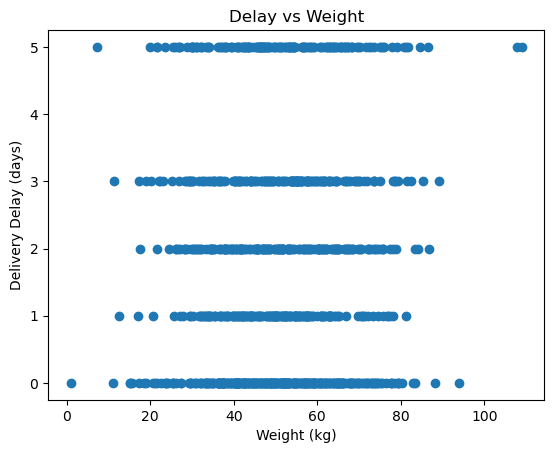

In [26]:
plt.scatter(df['Weight_kg'], df['Delivery_Delay'])
plt.xlabel('Weight (kg)')
plt.ylabel('Delivery Delay (days)')
plt.title('Delay vs Weight')
plt.show()


In [27]:
df[df['Any_Anomaly']]['Status'].value_counts()


Status
Delivered     143
Delayed        24
In-Transit      7
Lost            2
Name: count, dtype: int64

In [28]:
warehouse_summary = df[df['Any_Anomaly']].groupby('Warehouse_ID').agg(
    Total_Anomalies=('Order_ID', 'count'),
    Avg_Delay=('Delivery_Delay', 'mean'),
    Avg_Weight=('Weight_kg', 'mean')
).sort_values('Total_Anomalies', ascending=False)

# Add a simple explanation column
def explain_warehouse(row):
    return f"Warehouse {row.name} has {row['Total_Anomalies']} anomalies, Avg Delay: {row['Avg_Delay']:.1f} days, Avg Weight: {row['Avg_Weight']:.1f} kg"

warehouse_summary['Explanation'] = warehouse_summary.apply(explain_warehouse, axis=1)

warehouse_summary.reset_index(inplace=True)
warehouse_summary


,Warehouse_ID,Total_Anomalies,Avg_Delay,Avg_Weight,Explanation
0,W3,50,4.780000,56.106600,"Warehouse W3 has 50.0 anomalies, Avg Delay: 4...."
1,W4,42,4.666667,56.999524,"Warehouse W4 has 42.0 anomalies, Avg Delay: 4...."
2,W5,30,5.000000,47.398000,"Warehouse W5 has 30.0 anomalies, Avg Delay: 5...."
3,W1,27,4.740741,51.427778,"Warehouse W1 has 27.0 anomalies, Avg Delay: 4...."
4,W2,27,4.481481,55.851111,"Warehouse W2 has 27.0 anomalies, Avg Delay: 4...."


In [29]:
lane_summary = df[df['Any_Anomaly']].groupby('Lane').agg(
    Total_Anomalies=('Order_ID','count'),
    Avg_Delay=('Delivery_Delay','mean'),
    Avg_Weight=('Weight_kg','mean')
).sort_values('Total_Anomalies', ascending=False)

# Add explanation
def explain_lane(row):
    return f"Lane {row.name} has {row['Total_Anomalies']} anomalies, Avg Delay: {row['Avg_Delay']:.1f} days, Avg Weight: {row['Avg_Weight']:.1f} kg"

lane_summary['Explanation'] = lane_summary.apply(explain_lane, axis=1)

lane_summary.reset_index(inplace=True)
lane_summary.head(10)


,Lane,Total_Anomalies,Avg_Delay,Avg_Weight,Explanation
0,Seattle->LA,12,4.583333,57.457500,"Lane Seattle->LA has 12.0 anomalies, Avg Delay..."
1,Denver->Miami,9,5.000000,48.682222,"Lane Denver->Miami has 9.0 anomalies, Avg Dela..."
2,NYC->LA,8,4.750000,62.876250,"Lane NYC->LA has 8.0 anomalies, Avg Delay: 4.8..."
3,Denver->LA,8,5.000000,57.071250,"Lane Denver->LA has 8.0 anomalies, Avg Delay: ..."
4,Miami->Seattle,7,5.000000,56.110000,"Lane Miami->Seattle has 7.0 anomalies, Avg Del..."
5,Miami->NYC,7,5.000000,47.207143,"Lane Miami->NYC has 7.0 anomalies, Avg Delay: ..."
6,Denver->NYC,7,5.000000,57.381429,"Lane Denver->NYC has 7.0 anomalies, Avg Delay:..."
7,Miami->Chicago,6,5.000000,48.918333,"Lane Miami->Chicago has 6.0 anomalies, Avg Del..."
8,Chicago->Denver,5,5.000000,48.906000,"Lane Chicago->Denver has 5.0 anomalies, Avg De..."
9,LA->Houston,5,5.000000,61.980000,"Lane LA->Houston has 5.0 anomalies, Avg Delay:..."


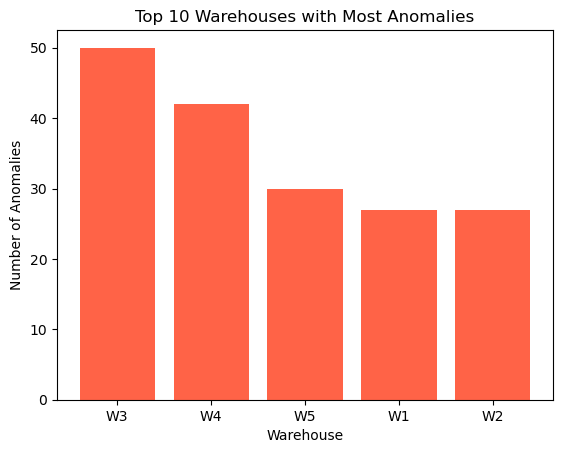

In [30]:
import matplotlib.pyplot as plt

top_warehouses = warehouse_summary.head(10)
plt.bar(top_warehouses['Warehouse_ID'], top_warehouses['Total_Anomalies'], color='tomato')
plt.xlabel('Warehouse')
plt.ylabel('Number of Anomalies')
plt.title('Top 10 Warehouses with Most Anomalies')
plt.show()


In [31]:
# Export to CSV
warehouse_summary.to_csv('Warehouse_Anomalies_Summary.csv', index=False)
lane_summary.to_csv('Lane_Anomalies_Summary.csv', index=False)


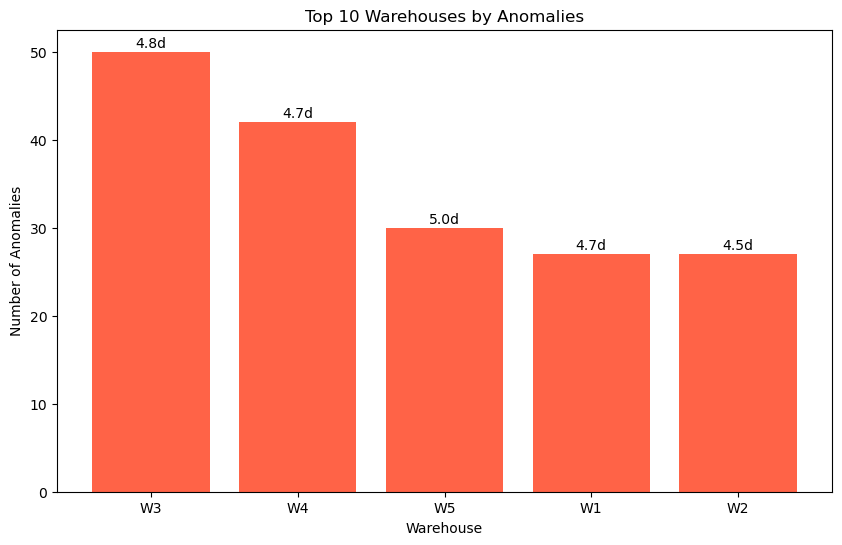

In [32]:
import matplotlib.pyplot as plt

top_warehouses = warehouse_summary.head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(top_warehouses['Warehouse_ID'], top_warehouses['Total_Anomalies'], color='tomato')
plt.xlabel('Warehouse')
plt.ylabel('Number of Anomalies')
plt.title('Top 10 Warehouses by Anomalies')

# Adding avg delay as text above bars
for bar, delay in zip(bars, top_warehouses['Avg_Delay']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{delay:.1f}d', ha='center')

plt.show()


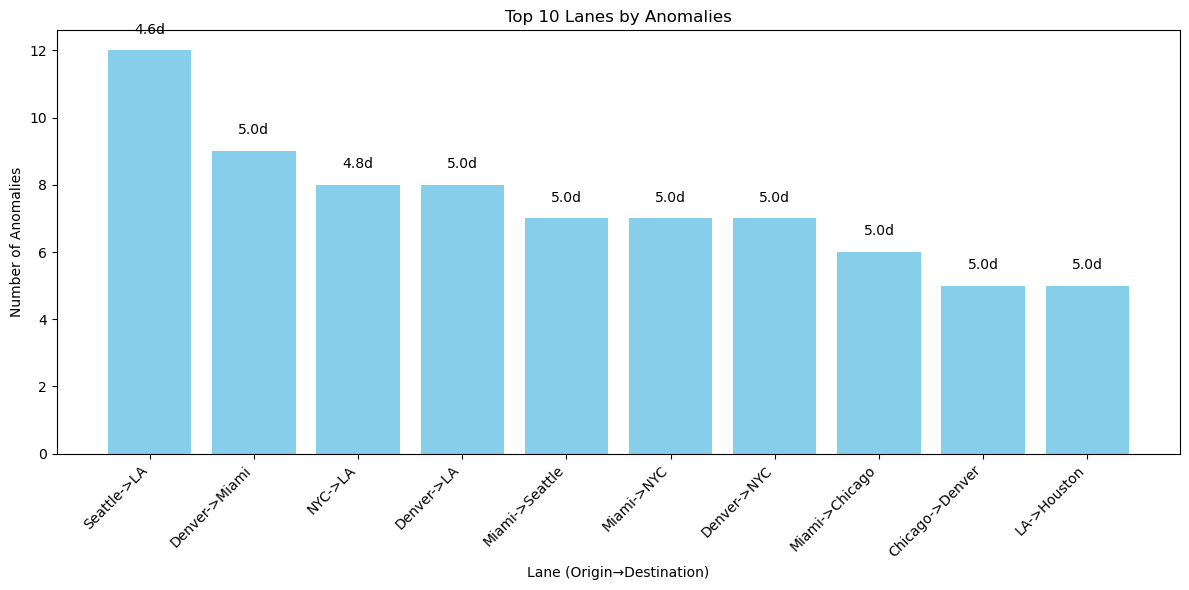

In [33]:
top_lanes = lane_summary.head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top_lanes['Lane'], top_lanes['Total_Anomalies'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Lane (Origin→Destination)')
plt.ylabel('Number of Anomalies')
plt.title('Top 10 Lanes by Anomalies')

# Adding avg delay as text above bars
for bar, delay in zip(bars, top_lanes['Avg_Delay']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{delay:.1f}d', ha='center')

plt.tight_layout()
plt.show()


/var/folders/fz/2px9_snj2tgdg1p62byvn1980000gq/T/ipykernel_20851/3900551047.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_lanes['Lane'], rotation=45, ha='right')


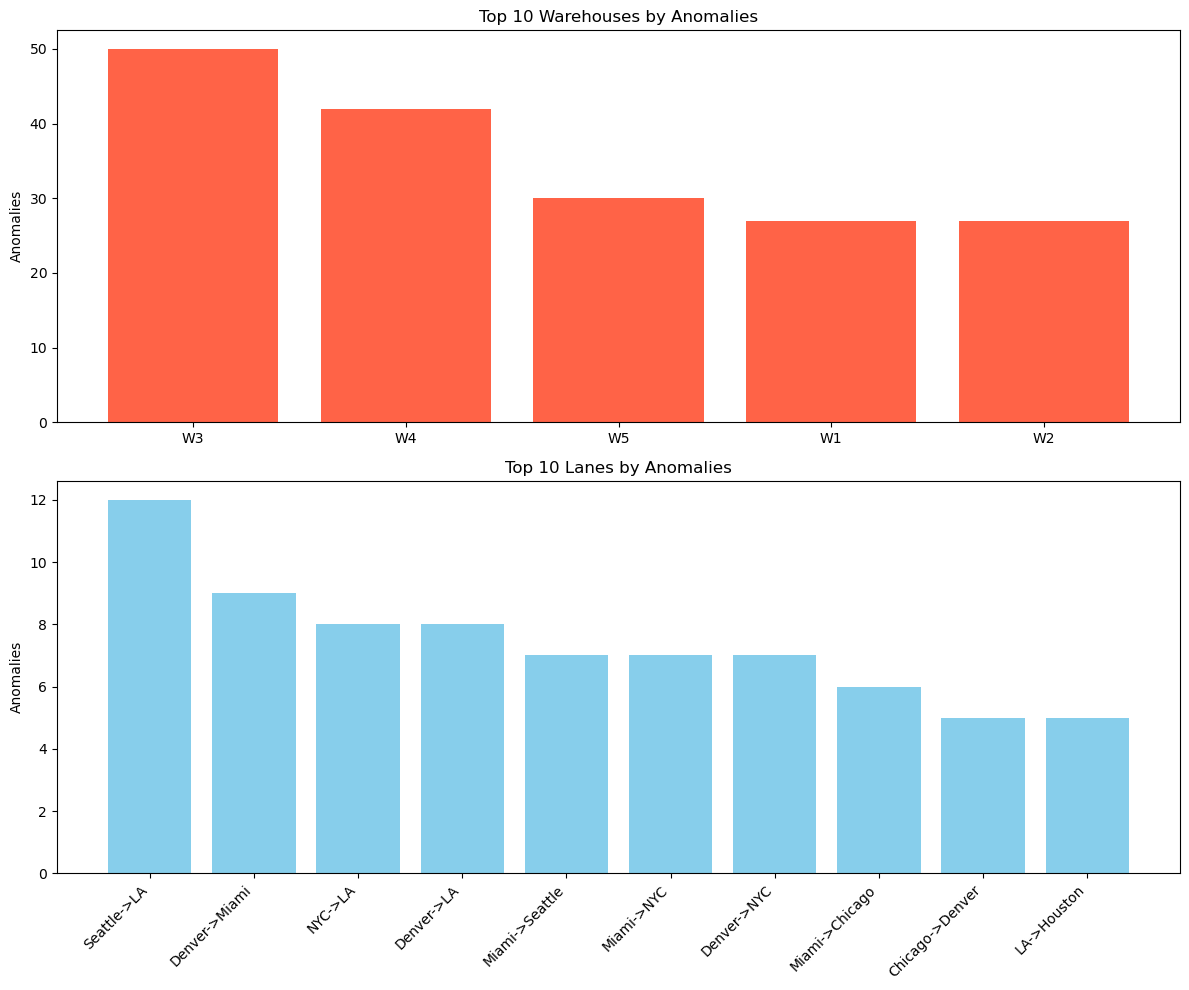

In [36]:
fig, axes = plt.subplots(2,1, figsize=(12,10))

# Warehouses
bars1 = axes[0].bar(top_warehouses['Warehouse_ID'], top_warehouses['Total_Anomalies'], color='tomato')
axes[0].set_ylabel('Anomalies')
axes[0].set_title('Top 10 Warehouses by Anomalies')

# Lanes
bars2 = axes[1].bar(top_lanes['Lane'], top_lanes['Total_Anomalies'], color='skyblue')
axes[1].set_ylabel('Anomalies')
axes[1].set_xticklabels(top_lanes['Lane'], rotation=45, ha='right')
axes[1].set_title('Top 10 Lanes by Anomalies')

plt.tight_layout()
plt.show()


# Conclusion:
#### This project identifies shipment anomalies in delivery delays and weights, highlights 
#### problem warehouses and lanes, and provides actionable insights. It demonstrates data 
#### analysis, anomaly detection, aggregation, and visualization skills for operational decision-making.


In [ ]:
"""
Project: Shipment Operations Anomaly Detection

Objective:
- Analyze shipment data to identify operational anomalies in delivery delay and shipment weight.

Steps Performed:
1. Explored dataset and understood distributions of Delivery_Delay and Weight_kg.
2. Flagged anomalies:
   - Delay anomalies: shipments delayed >= 4 days.
   - Weight anomalies: unusually heavy or light shipments.
3. Combined anomalies into 'Any_Anomaly' and created 'Anomaly_Report' for explanations.
4. Aggregated anomalies by Warehouse_ID and Lane to find hotspots.
5. Visualized top warehouses and lanes with bar charts for quick insight.
6. Exported summarized tables for reporting.

Key Findings:
- Certain warehouses (e.g., W3, W4) and lanes (e.g., Denver->LA, Denver->Chicago) have the most anomalies.
- Heavy shipments sometimes correlate with delays.
- Most anomalies are actionable, guiding operational improvements.

Skills Demonstrated:
- Data cleaning, exploration, anomaly detection
- Aggregation, visualization, actionable reporting
- Translating raw data into meaningful insights
"""
